In [2]:
%pylab inline
import Template, Analysis
t = {'t':Template.Template(np.zeros(10)),}

Populating the interactive namespace from numpy and matplotlib


In [2]:
print '%20s' % 'NAME', '%25s' % 'LIMITS', '%10s' % 'VALUE', '%10s' % 'FIX_NORM', '%10s' % 'FIX_SPEC'
for key in t:
            temp = t[key]
            print '%20s' % key, '%25s' % temp.limits, '%10s' % temp.value, '%10s' % temp.fixNorm, '%10s' % temp.fixSpectrum
        



In [21]:
reload(Analysis)

A = Analysis.Analysis()
A.AddPointSourceTemplate()


In [20]:
A.AddTemplate('test',np.zeros(10))
A.AddTemplate('test2',np.zeros(10))

A.PrintTemplates()

A.RemoveTemplate('test')
A.PrintTemplates()


In [9]:
E,flux,fluxUnc = np.genfromtxt('iso_clean_v05.txt').T




# Build a power law interpolator
fluxInterp = lambda x: np.exp(np.interp(np.log(x),np.log(E),np.log(flux)))
fluxUncInterp = lambda x: np.exp(np.interp(np.log(x),np.log(E),np.log(fluxUnc)))

fluxInterp(1)


    

In [8]:
f = np.zeros(shape=(1000,1000))
f2 = np.zeros(shape=(100,100))


%timeit f[:100,:100]*f[:100,:100]
%timeit f2*f2


In [51]:
a = np.ones(shape=(2,3,3))
print np.inner([2,3],a)

In [1]:
import Template, Analysis, Likelihood
reload(Analysis)
A = Analysis.Analysis()

In [2]:
A.AddIsotropicTemplate()
A.BinPhotons()
A.AddPointSourceTemplate()
A.GenSquareMask(l_range=[-20,20],b_range=[-20,20],plane_mask=2)
A.PrintTemplates()


                NAME                    LIMITS      VALUE    FIXNORM    FIXSPEC   SRCCLASS
                 PSC                [0, 100.0]          1      False      False        PSC
           Isotropic             [0, 100000.0]          1       True       True        ISO


In [3]:
import GammaLikelihood as like
reload(like)
#healpy.mollview(A.binned_data[10])

m, res = like.RunLikelihood(A,print_level=2,use_basinhopping=True)



Masking completed in 2.2890e-02 s
Code generation completed in 1.9685e-02 s
0 2.91601e+06
500 2.42909e+06
1000 2.13719e+06
1500 2.12504e+06
2000 2.12132e+06
2500 2.12132e+06
3000 2.11996e+06
3500 2.10785e+06
4000 253064.0


GammaLikelihood.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if analysis.binned_data==None:


FCN = -32491.4707031 
 TOTAL NCALL = 4089 
 NCALLS = 4076 
 
 
 EDM = 6178773425.95 
 GOAL EDM = 0.005 
 
 UP = 0.5 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 False 
 True 
 False 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 True 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,PSC_0,3.330408e+01,7.146903e-02,0.000000e+00,0.000000e+00,0.0,100.0,
2,PSC_1,5.672766e+01,6.939211e+01,0.000000e+00,0.000000e+00,0.0,100.0,
3,PSC_2,6.330680e+01,3.527351e-01,0.000000e+00,0.000000e+00,0.0,100.0,
4,PSC_3,9.276538e+01,2.015931e+01,0.000000e+00,0.000000e+00,0.0,100.0,
5,PSC_4,5.003118e+01,1.444440e-01,0.000000e+00,0.000000e+00,0.0,100.0,
6,PSC_5,1.798187e+01,6.162607e-02,0.000000e+00,0.000000e+00,0.0,100.0,
7,PSC_6,2.719611e+01,3.086945e+01,0.000000e+00,0.000000e+00,0.0,100.0,
8,PSC_7,6.103635e+01,2.439648e-01,0.000000e+00,0.000000e+00,0.0,100.0,
9,PSC_8,3.754229e+01,3.931706e+01,0.000000e+00,0.000000e+00,0.0,100.0,
10,PSC_9,6.804375e+01,3.144619e-01,0.000000e+00,0.000000e+00,0.0,100.0,


Likelihood fit completed in 2.5238e+01 s
basinhopping step 0: f 501850
basinhopping step 1: f 492504 trial_f 492504 accepted 1  lowest_f 492504
found new global minimum on step 1 with function value 492504
basinhopping step 2: f 492504 trial_f 517145 accepted 0  lowest_f 492504
basinhopping step 3: f 492504 trial_f 544576 accepted 0  lowest_f 492504
basinhopping step 4: f 489988 trial_f 489988 accepted 1  lowest_f 489988
found new global minimum on step 4 with function value 489988
basinhopping step 5: f 459455 trial_f 459455 accepted 1  lowest_f 459455
found new global minimum on step 5 with function value 459455
basinhopping step 6: f -403901 trial_f -403901 accepted 1  lowest_f -403901
found new global minimum on step 6 with function value -403901
basinhopping step 7: f -406859 trial_f -406859 accepted 1  lowest_f -406859
found new global minimum on step 7 with function value -406859
basinhopping step 8: f -406859 trial_f -405486 accepted 0  lowest_f -406859
basinhopping step 9: f -

/home/carlson/anaconda/lib/python2.7/site-packages/scipy/optimize/_basinhopping.py:290: RuntimeWarning: overflow encountered in exp
  w = min(1.0, np.exp(-(energy_new - energy_old) * self.beta))


KeyboardInterrupt: 

In [44]:
for i in range(24):
    print np.mean(A.templateList['PSC'].healpixCube[i]),np.mean(A.binned_data[i])

In [21]:
print m.fitarg
norms=[]
bins = []
for i in range(24):
    bins.append(A.bin_edges[i])
    norms.append( m.fitarg['PSC_'+str(i)])
    
plt.loglog(bins,norms)    

print A.mask
idx = np.where(A.mask!=0)[0]
np.mean(A.binned_data[0,idx])




In [4]:
print list(A.bin_edges


[300, 350, 400, 450, 500, 557.4511962326, 624.9931144482831, 705.0811841511901, 800.9547380631948, 916.9544789959854, 1058.9994895010252, 1235.32183584898, 1457.6298200740125, 1743.0094229290717, 2117.148088832825, 2620.038055486477, 3316.5858204132596, 4317.5724796525965, 5824.226374320851, 8232.171915073328, 12404.648624640446, 20517.115667189668, 39361.808463774716, 99337.18520898951, 499999.9999999654]


In [17]:
x = np.vectorize(log)
%timeit np.log(a)
%timeit np.sum(a)

In [11]:
print len(np.nonzero(A.GenSquareMask(l_range=[-20,20],b_range=[-20,20],plane_mask=2))[0])
print np.shape(np.nonzero(A.mask))

In [59]:
import pycuda.driver as drv
import pycuda.tools
import pycuda.autoinit
import numpy
import numpy.linalg as la
from pycuda.compiler import SourceModule

mod = SourceModule("""
__global__ void multiply_them(float *dest, float *a, float *b)
{
  const int i = threadIdx.x;
  dest[i] = a[i] * b[i];
}
""")

multiply_them = mod.get_function("multiply_them")

a = numpy.random.randn(400).astype(numpy.float32)
b = numpy.random.randn(400).astype(numpy.float32)

dest = numpy.zeros_like(a)
#multiply_them(
#        drv.Out(dest), drv.In(a), drv.In(b),
#        block=(40000,1,1))

#print dest-a*b

%timeit multiply_them(drv.Out(dest), drv.In(a), drv.In(b),block=(400,1,1))

%timeit a*b


In [2]:
import pycuda.driver as drv

In [116]:
import numpy as np
import cudamat as cm

cm.cublas_init()

# create two random matrices and copy them to the GPU
a = cm.CUDAMatrix(np.random.rand(320, 2560))
b = cm.CUDAMatrix(np.random.rand(2560, 320))

# perform calculations on the GPU
%timeit c = cm.dot(a, b)
%timeit d = c.sum(axis = 0)



a = np.random.rand(320, 2560)
b = np.random.rand(2560, 320)

%timeit np.dot(a,b)
%timeit np.sum(b)

# copy d back to the host (CPU) and print
print d.asarray()

In [46]:
a = cm.CUDAMatrix(np.random.rand(24, 26786))
b = cm.CUDAMatrix(np.random.rand(24, 26786))

cm.dot(a,b.T)
%timeit cm.log(a).asarray()





In [18]:
a = np.random.rand(320, 2560)
%timeit cm.CUDAMatrix(a)



In [115]:
a = cm.CUDAMatrix(np.zeros((2, 2)))
a.add(np.e**2 target=)
print cm.log(a).asarray()
print a.asarray()

Populating the interactive namespace from numpy and matplotlib


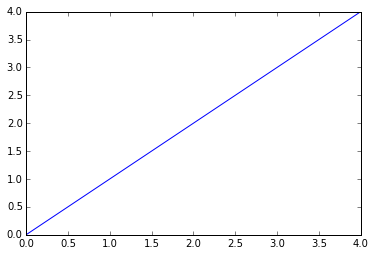